# 色座標変換プログラム実行プログラム
モジュールとして変換プログラムを読み込んで使用する。<br>
このプログラムはメイン関数としてのみ使用する。

- 着色に関して参考にできそう<br>
https://www.t-kougei.ac.jp/activity/research/pdf/vol36-1-09.pdf

- ToDo<br>
    - xyz->RGBの逆変換も作る
    - 各モジュールに対しても同様に逆変換を作る

    - プロットの色をRGBまたはカラーコードで指定する -> 色度図の色の変化をわかりやすくする<br>
    RGB指定の場合、0~255ではなく、0~1で指定する。<br>
    https://note-tech.com/matplotlib-color/#toc3

    - 測色結果を元に色変換ができるようにする（汎用性の向上）
    - RGB - L*a*b*を作成
    - RGB - lmsを作成
    - RGB - dklを作成


## 刺激値からは刺激値にだけ変換する。
## 変換先の刺激値から座標値への変換は別に作る


#### ○ 必要なライブラリのインポート

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# ↓これがないとグラフが表示されない。（画像として表示されるので動かすことはできない。）

%matplotlib inline

# ↓jupytor note book で使う時用（グリグリ動かせるようになる）
# %matplotlib notebook

#### ○ 作成したモジュールのインポート

In [2]:
import __main__
from color_conversion_modules import myfunc_ConversionColor
# 動かない時はリスタート

(0.734671, 0.265329, 0.0) (2.7689, 1.0, 0.0)


#### ○ メイン関数

TypeError: cannot unpack non-iterable numpy.float64 object

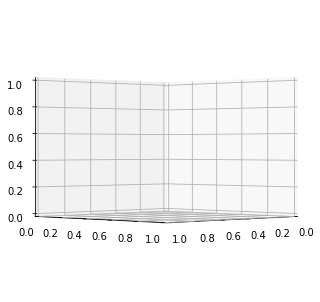

In [3]:
if __name__ == "__main__":
    inst_RGB_to_xyz = myfunc_ConversionColor.RGB_to_xyz()        # インスタンス生成
    inst_Luv_to_xyz = myfunc_ConversionColor.Luv_to_RGB()        # インスタンス生成

    inputNum = input()
    
    if inputNum == "plot":      # グラフをプロットする処理
        
        inputNum2 = input()
        
        if inputNum2 == "xyz":
            # ====================================
            # xyz色度座標値をプロットする。
            # ====================================
            inst_RGB_to_xyz.xyz_for_plot()

        elif inputNum2 == "Luv":
            # ====================================
            # L*u*v*色度座標値をプロットする。
            # ====================================
            inst_Luv_to_xyz.Luv_for_plot()
            
        else:   # 例外処理
            print("入力値エラー(半角英字で入力する)")


    elif inputNum == "num":     # 座標を取得する処理
        # ====================================
        # RGBの三刺激値(0~255)からxyz色度座標値を求める。
        # ====================================
        xyz, XYZ = inst_RGB_to_xyz.RGB2xyz(255, 0, 0)     # 指定されたRGBの色座標を算出
        x=xyz[0]; y=xyz[1]; z=xyz[2]; Y=XYZ[1]
        print('(x, y, z) = ', (x, y, z))

        R,G,B = inst_RGB_to_xyz.xyL2RGB(x, y, Y)
        print('(r, g, b) = ', (R, G, B))

        # ====================================
        # RGBの三刺激値(0~255)からl*u*v*色度座標値を求める。
        # ====================================
        L_star,u_star,v_star = inst_Luv_to_xyz.RGB2Luv(255, 0, 0)
        print('(L*, u*, v*) = ', L_star, u_star, v_star)

        R,G,B = inst_Luv_to_xyz.Luv2RGB(L_star, u_star, v_star)
        print('(r, g, b) = ', (R, G, B))


    else:   # 例外処理
        print("入力値エラー(半角数字で入力する。)")

    plt.show()